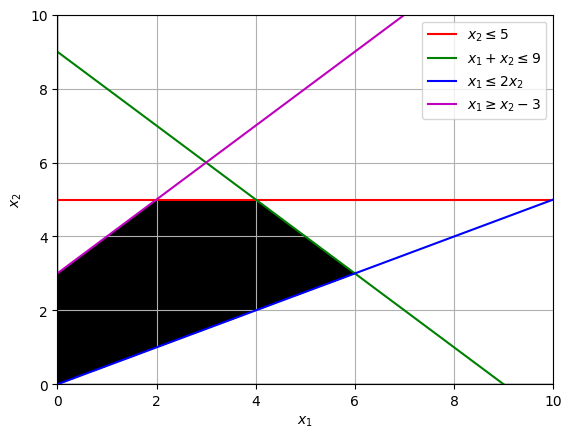

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

# Define the coefficients of the inequalities
A = np.array([[0, -1], [-1, -1], [-1, 2], [1, -1]])
b = np.array([-5, -9, 0, -3])

# Define the non-negativity constraints
x1 = np.linspace(0, 10, 400)  # Adjust the range as needed
x2 = np.linspace(0, 10, 400)  # Adjust the range as needed
X1, X2 = np.meshgrid(x1, x2)

# Define the inequalities
inequalities = [A[i, 0] * X1 + A[i, 1] * X2 >= b[i] for i in range(len(A))]

# Combine the inequalities and non-negativity constraints
feasible_region = np.ones(X1.shape, dtype=bool)
for ineq in inequalities:
    feasible_region = np.logical_and(feasible_region, ineq)

# Create a Polygon to represent the feasible region
polygon = Polygon(np.column_stack((X1[feasible_region], X2[feasible_region])),
                  edgecolor='k', facecolor='none')

# Create the plot
fig, ax = plt.subplots()
ax.add_patch(polygon)
plt.xlim(0, 10)  # Adjust the limits as needed
plt.ylim(0, 10)  # Adjust the limits as needed
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

# Plot the non-negativity constraints (x1 >= 0 and x2 >= 0)
plt.axhline(0, color='k', lw=1)
plt.axvline(0, color='k', lw=1)

# Plot additional constraints (x2 <= 5, x1 + x2 <= 9, x1 <= 2x2, and x1 >= x2 - 3)
plt.plot(x1, 5 * np.ones_like(x1), label='$x_2 \leq 5$', color='r')
plt.plot(x1, 9 - x1, label='$x_1 + x_2 \leq 9$', color='g')
plt.plot(x1, x1 / 2, label='$x_1 \leq 2x_2$', color='b')
plt.plot(x1, x1 + 3, label='$x_1 \geq x_2 - 3$', color='m')

plt.legend()
plt.grid(True)
plt.show()


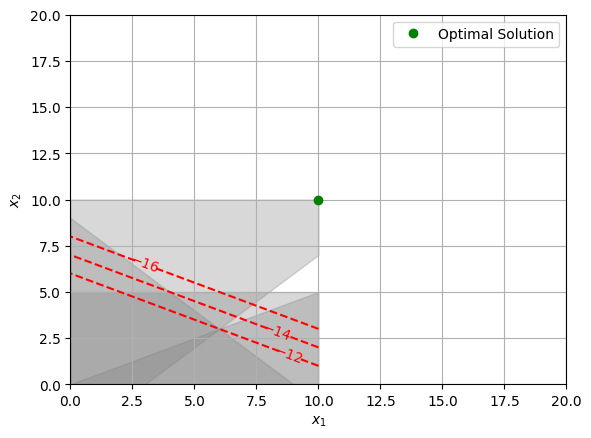

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define the coefficients of the objective function
c = np.array([-1, -2])

# Create a grid of x1 and x2 values
x1 = np.linspace(0, 10, 400)
x2 = np.linspace(0, 10, 400)
X1, X2 = np.meshgrid(x1, x2)

# Compute the objective function c^Tx for each point in the grid
z = c[0] * X1 + c[1] * X2

# Define the contour levels for the objective function
contour_levels = [-16, -14, -12]

# Create the contour plot
contour = plt.contour(X1, X2, z, levels=contour_levels, colors='r')

# Label the contour lines
plt.clabel(contour, inline=1, fontsize=10)

# Plot the feasible region
A = np.array([[0, -1], [-1, -1], [-1, 2], [1, -1]])
b = np.array([-5, -9, 0, -3])
plt.fill_between(x1, 0, 5, color='gray', alpha=0.3)
plt.fill_between(x1, 0, 9 - x1, color='gray', alpha=0.3)
plt.fill_between(x1, 0, x1 / 2, color='gray', alpha=0.3)
plt.fill_between(x1, x1 - 3, 10, color='gray', alpha=0.3)

# Find the optimal solution (point with the lowest contour level)
min_z = np.min(z)
min_idx = np.argmin(z)
optimal_x1 = X1.ravel()[min_idx]
optimal_x2 = X2.ravel()[min_idx]

# Mark the optimal solution point
plt.plot(optimal_x1, optimal_x2, 'go', label='Optimal Solution')

# Set axis limits and labels
plt.xlim(0, 20)
plt.ylim(0, 20)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

# Add a legend
plt.legend()

plt.grid(True)
plt.show()



In [7]:
# Find the optimal solution (point with the lowest contour level)
min_z = np.min(z)
min_idx = np.argmin(z)
optimal_x1 = X1.ravel()[min_idx]
optimal_x2 = X2.ravel()[min_idx]

# Print the optimal solution
print("Optimal Solution:")
print(f"x1 = {optimal_x1}")
print(f"x2 = {optimal_x2}")


Optimal Solution:
x1 = 10.0
x2 = 10.0


In [8]:
from pulp import LpProblem, LpVariable, LpMinimize, lpSum

# Define the coefficients of the objective function
c = [-1, -2]

# Define the problem as a linear program
lp_problem = LpProblem(name="LP_Problem", sense=LpMinimize)

# Define decision variables
x1 = LpVariable("x1", lowBound=0, cat='Continuous')
x2 = LpVariable("x2", lowBound=0, cat='Continuous')

# Define the objective function
lp_problem += c[0] * x1 + c[1] * x2, "Objective"

# Define the constraints
A = [
    [0, -1],
    [-1, -1],
    [-1, 2],
    [1, -1]
]
b = [-5, -9, 0, -3]

for i in range(len(A)):
    constraint = lpSum(A[i][0] * x1 + A[i][1] * x2) >= b[i]
    lp_problem += constraint, f"Constraint_{i+1}"

# Solve the linear program
lp_problem.solve()

# Get the optimal solution
optimal_x1 = x1.varValue
optimal_x2 = x2.varValue
optimal_objective = lp_problem.objective.value()

# Print the results
print("Optimal Solution:")
print(f"x1 = {optimal_x1}")
print(f"x2 = {optimal_x2}")
print(f"Optimal Objective Value: {optimal_objective}")


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/rohansingh/opt/anaconda3/envs/machinelearning/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/yb/n2ch33ws4yzf1nn686jzrjs40000gn/T/9bbeafe829e74084a02c7fe64237cdda-pulp.mps timeMode elapsed branch printingOptions all solution /var/folders/yb/n2ch33ws4yzf1nn686jzrjs40000gn/T/9bbeafe829e74084a02c7fe64237cdda-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 9 COLUMNS
At line 19 RHS
At line 24 BOUNDS
At line 25 ENDATA
Problem MODEL has 4 rows, 2 columns and 7 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 3 (-1) rows, 2 (0) columns and 6 (-1) elements
0  Obj 0 Dual inf 2.999998 (2)
1  Obj -14
Optimal - objective value -14
After Postsolve, objective -14, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective -14 - 1 iterations time 0.002, Presolve 0.00
Option for printingOptions ch

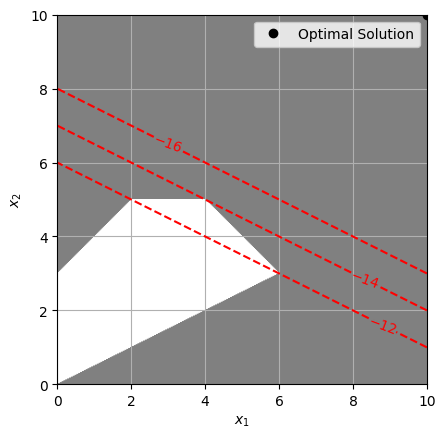

In [10]:

import numpy as np
import matplotlib.pyplot as plt

# Define the coefficients of the objective function
c = np.array([-1, -2])

# Create a grid of x1 and x2 values
x1 = np.linspace(0, 10, 400)
x2 = np.linspace(0, 10, 400)
X1, X2 = np.meshgrid(x1, x2)

# Compute the objective function c^Tx for each point in the grid
z = c[0] * X1 + c[1] * X2

# Define the contour levels for the objective function
contour_levels = [-16, -14, -12]

# Create the contour plot
contour = plt.contour(X1, X2, z, levels=contour_levels, colors='r')

# Label the contour lines
plt.clabel(contour, inline=1, fontsize=10)

# Plot the feasible region
A = np.array([[0, -1], [-1, -1], [-1, 2], [1, -1]])
b = np.array([-5, -9, 0, -3])

feasible_region = np.all(A @ np.vstack((X1.ravel(), X2.ravel())) >= b[:, np.newaxis], axis=0).reshape(X1.shape)
plt.imshow(feasible_region, extent=(0, 10, 0, 10), origin='lower', cmap='gray', alpha=0.5)

# Find the optimal solution (point with the lowest contour level)
min_z = np.min(z)
min_idx = np.argmin(z)
optimal_x1 = X1.ravel()[min_idx]
optimal_x2 = X2.ravel()[min_idx]

# Mark the optimal solution point
plt.plot(optimal_x1, optimal_x2, 'ko', label='Optimal Solution')

# Set axis limits and labels
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

# Add a legend
plt.legend()

plt.grid(True)
plt.show()

$$
\begin{bmatrix}
0 & 0 & 5 & 10 & 15 & 20 & 25 & 30 & 35 & 40 & 45 & 50 & 55 & 60 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
1 & 0 & 0 & 0 & 0 & 100 & 100 & 100 & 100 & 100 & 100 & 100 & 100 & 100 \\
2 & 0 & 0 & 0 & 0 & 100 & 100 & 100 & 100 & 100 & 100 & 120 & 120 & 120 \\
3 & 0 & 0 & 0 & 0 & 100 & 130 & 130 & 130 & 130 & 130 & 130 & 130 & 130 \\
4 & 0 & 0 & 0 & 0 & 100 & 130 & 130 & 130 & 130 & 160 & 160 & 160 & 160 \\
5 & 0 & 0 & 0 & 0 & 100 & 130 & 130 & 130 & 130 & 160 & 160 & 160 & 190 \\
\end{bmatrix}
$$


$$\begin{array}{|c|c|c|c|c|c|c|c|c|c|c|c|}
\hline
\text{Weight Capacity (lbs)} & 0 & 5 & 10 & 15 & 20 & 25 & 30 & 35 & 40 & 45 & 50 & 55 & 60 \\
\hline
\text{Item 1} & 0 & 0 & 0 & 0 & 100 & 100 & 100 & 100 & 100 & 100 & 100 & 100 & 100 \\
\hline
\text{Item 2} & 0 & 0 & 0 & 0 & 100 & 100 & 100 & 100 & 100 & 100 & 120 & 120 & 120 \\
\hline
\text{Item 3} & 0 & 0 & 0 & 0 & 100 & 130 & 130 & 130 & 130 & 130 & 130 & 130 & 130 \\
\hline
\text{Item 4} & 0 & 0 & 0 & 0 & 100 & 130 & 130 & 130 & 130 & 160 & 160 & 160 & 160 \\
\hline
\text{Item 5} & 0 & 0 & 0 & 0 & 100 & 130 & 130 & 130 & 130 & 160 & 160 & 160 & 190 \\
\hline
\end{array}$$

The maximum value obtained with a knapsack that can hold 60 lbs is $190.

In [1]:
def maxCoinsInLine(coins):
    n = len(coins)
    # Create an n x n matrix to store the maximum values
    dp = [[0] * n for _ in range(n)]

    # Initialize the diagonal values with the coin values
    for i in range(n):
        dp[i][i] = coins[i]

    # Fill in the matrix using a bottom-up approach
    for length in range(2, n + 1):
        for i in range(n - length + 1):
            j = i + length - 1
            dp[i][j] = max(coins[i] - dp[i + 1][j], coins[j] - dp[i][j - 1])

    # The maximum amount Alice can win is stored in dp[0][n - 1]
    return dp[0][n - 1]

# Example coin values
coins = [5, 1, 7, 5, 10, 9, 7, 8]

# Call the function to find the maximum amount Alice can win
max_winnings = maxCoinsInLine(coins)
print("Maximum amount Alice can win:", max_winnings)

Maximum amount Alice can win: 8


In [2]:
dp_matrix = maxCoinsGame(coins)

# Print the dp matrix
for row in dp_matrix:
    print(row)

NameError: name 'maxCoinsGame' is not defined

In [3]:
def maxCoins(nums):
    n = len(nums)
    
    # Create a 2D DP table to store the maximum value that can be collected.
    dp = [[0] * n for _ in range(n)]

    # Initialize the base case: single coins.
    for i in range(n):
        dp[i][i] = nums[i]

    # Fill in the DP table using bottom-up dynamic programming.
    for length in range(2, n + 1):
        for i in range(n - length + 1):
            j = i + length - 1
            # The player can choose either the first or last coin in the range.
            # The opponent will then choose the best option for the remaining coins.
            dp[i][j] = max(nums[i] - dp[i + 1][j], nums[j] - dp[i][j - 1])

    # The final entry in the DP table represents the maximum value for the entire range.
    return dp[0][n - 1]

# Example usage:
nums = [5, 1, 7, 5, 10, 9, 7, 8]
result = maxCoins(nums)
print("Maximum value of coins collected:", result)


Maximum value of coins collected: 8


In [4]:
def maxCoins_1(nums):
    n = len(nums)
    
    # Create a 2D DP table to store the maximum value that can be collected.
    dp = [[0] * n for _ in range(n)]

    # Initialize the base case: single coins.
    for i in range(n):
        dp[i][i] = nums[i]

    # Fill in the DP table using bottom-up dynamic programming.
    for length in range(2, n + 1):
        for i in range(n - length + 1):
            j = i + length - 1
            # The player can choose either the first or last coin in the range.
            # The opponent will then choose the best option for the remaining coins.
            dp[i][j] = max(nums[i] - dp[i + 1][j], nums[j] - dp[i][j - 1])

    # Print the DP table.
    for i in range(n):
        for j in range(n):
            print(dp[i][j], end="\t")
        print()
    
    # The final entry in the DP table represents the maximum value for the entire range.
    return dp[0][n - 1]

# Example usage:
nums = [5, 1, 7, 5, 10, 9, 7, 8]
result = maxCoins_1(nums)
print("Maximum value of coins collected:", result)


5	4	3	6	4	7	0	8	
0	1	6	-1	11	-2	9	-1	
0	0	7	2	8	3	4	4	
0	0	0	5	5	4	3	5	
0	0	0	0	10	1	8	2	
0	0	0	0	0	9	2	8	
0	0	0	0	0	0	7	1	
0	0	0	0	0	0	0	8	
Maximum value of coins collected: 8


In [5]:
def maxCoins_2(nums):
    n = len(nums)
    
    # Create a memoization table to store computed values.
    memo = [[-1] * n for _ in range(n)]

    def dp(i, j):
        if i > j:
            return 0
        if memo[i][j] != -1:
            return memo[i][j]

        # Calculate the maximum value using the given pattern.
        option1 = nums[i] + min(dp(i + 2, j), dp(i + 1, j - 1))
        option2 = nums[j] + min(dp(i + 1, j - 1), dp(i, j - 2))
        memo[i][j] = max(option1, option2)
        return memo[i][j]

    return dp(0, n - 1)

# Example usage:
nums = [5, 1, 7, 5, 10, 9, 7, 8]
result = maxCoins_2(nums)
print("Maximum value of coins collected:", result)


Maximum value of coins collected: 30


In [6]:
def maxCoins_4(nums):
    n = len(nums)

    # Create a matrix to store the dynamic programming values.
    dp = [[0] * n for _ in range(n)]

    for i in range(n):
        dp[i][i] = nums[i]

    # Fill in the DP table using bottom-up dynamic programming.
    for length in range(2, n + 1):
        for i in range(n - length + 1):
            j = i + length - 1

            option1 = nums[i] + (dp[i + 2][j] if i + 2 <= j else 0)
            option1 = option1 + min(dp[i + 1][j - 1] if i + 1 <= j - 1 else 0,
                                    dp[i + 1][j - 1] if i + 1 <= j - 1 else 0)

            option2 = nums[j] + (dp[i + 1][j - 1] if i + 1 <= j - 1 else 0)
            option2 = option2 + min(dp[i][j - 2] if i <= j - 2 else 0,
                                    dp[i][j - 2] if i <= j - 2 else 0)

            dp[i][j] = max(option1, option2)

    # Print the DP table.
    for i in range(n):
        for j in range(n):
            print(dp[i][j], end="\t")
        print()

    # The final entry in the DP table represents the maximum value for the entire range.
    return dp[0][n - 1]

# Example usage:
nums = [5, 1, 7, 5, 10, 9, 7, 8]
result = maxCoins_4(nums)
print("Maximum value of coins collected:", result)


5	5	13	19	40	56	109	125	
0	1	7	13	24	47	58	116	
0	0	7	7	22	27	57	62	
0	0	0	5	10	24	27	58	
0	0	0	0	10	10	26	27	
0	0	0	0	0	9	9	24	
0	0	0	0	0	0	7	8	
0	0	0	0	0	0	0	8	
Maximum value of coins collected: 125


In [11]:
def knapsack_01(items, capacity):
    n = len(items)
    # Create a matrix to store the maximum values for different weights
    dp = [[0 for _ in range(capacity + 1)] for _ in range(n + 1)]

    for i in range(1, n + 1):
        for w in range(capacity + 1):
            # If the current item's weight exceeds the current capacity, skip it
            if items[i - 1][1] > w:
                dp[i][w] = dp[i - 1][w]
            else:
                # Consider two cases: including the item and excluding the item
                dp[i][w] = max(dp[i - 1][w], items[i - 1][0] + dp[i - 1][w - items[i - 1][1]])

    # Find the selected items
    selected_items = []
    w = capacity
    for i in range(n, 0, -1):
        if dp[i][w] != dp[i - 1][w]:
            selected_items.append(items[i - 1])
            w -= items[i - 1][1]

    # Return the maximum value and the selected items
    return dp[n][capacity], selected_items, dp

# Define the items as a list of tuples (value, weight)
items = [(100, 20), (20, 10), (30, 5), (160, 40), (90, 30)]

# Define the knapsack capacity
capacity = 60

# Call the knapsack function
max_value, selected_items, dp = knapsack_01(items, capacity)

# Output the results
print("Maximum value:", max_value)
print("Selected items:")
for item in selected_items:
    print("Value:", item[0], "Weight:", item[1])

Maximum value: 260
Selected items:
Value: 160 Weight: 40
Value: 100 Weight: 20


In [21]:
temp = []
for i in range(len(dp)):
    tempu = []
    for j in range(0,len(dp[0]),5):
        tempu.append(dp[i][j])
        print(dp[i][j], end="\t")
    temp.append(tempu)
    print()

0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	100	100	100	100	100	100	100	100	100	
0	0	20	20	100	100	120	120	120	120	120	120	120	
0	30	30	50	100	130	130	150	150	150	150	150	150	
0	30	30	50	100	130	130	150	160	190	190	210	260	
0	30	30	50	100	130	130	150	160	190	190	220	260	


In [26]:
print(temp)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 100, 100, 100, 100, 100, 100, 100, 100, 100], [0, 0, 20, 20, 100, 100, 120, 120, 120, 120, 120, 120, 120], [0, 30, 30, 50, 100, 130, 130, 150, 150, 150, 150, 150, 150], [0, 30, 30, 50, 100, 130, 130, 150, 160, 190, 190, 210, 260], [0, 30, 30, 50, 100, 130, 130, 150, 160, 190, 190, 220, 260]]


In [16]:
import pandas as pd

In [25]:
df = pd.DataFrame(temp)

In [27]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,100,100,100,100,100,100,100,100,100
2,0,0,20,20,100,100,120,120,120,120,120,120,120
3,0,30,30,50,100,130,130,150,150,150,150,150,150
4,0,30,30,50,100,130,130,150,160,190,190,210,260
5,0,30,30,50,100,130,130,150,160,190,190,220,260


In [28]:
df.to_csv("../csds_410.csv")

In [29]:
def telescope_scheduling(L):

    # Step 1: Sort the observation requests by finish time

    L_sorted = sorted(L, key=lambda x: x[1])

    # Step 2: Initialize dp table

    n = len(L_sorted)

    dp = [0] * n

    # Step 3: Fill in the dp table

    for i in range(n):

        dp[i] = L_sorted[i][2]  # Initialize with the benefit of the current request

        for j in range(i):

            if L_sorted[i][0] >= L_sorted[j][1]:

                dp[i] = max(dp[i], dp[j] + L_sorted[i][2])

    # Step 4: Find the maximum total benefit

    max_benefit = max(dp)

    return max_benefit

# Test with your example

L = [(1, 2, 5), (1, 3, 4), (2, 4, 7), (3, 5, 2), (1, 6, 3), (4, 7, 5), (6, 8, 7), (7, 9, 4)]

result = telescope_scheduling(L)

print("Maximum total benefit:", result)

Maximum total benefit: 21


In [36]:
def maxCoinsInLine(coins):
    n = len(coins)
    # Create an n x n matrix to store the maximum values
    dp = [[0] * n for _ in range(n)]

    # Initialize the diagonal values with the coin values
    for i in range(n):
        dp[i][i] = coins[i]

    for i in range(n-1):
        dp[i][i+1] = max(coins[i],coins[i+1])

    # Fill in the matrix using a bottom-up approach
    for length in range(2, n+1):
        for i in range(n - length + 1):
            j = i + length - 1
            dp[i][j] = max(coins[i] - dp[i + 1][j], coins[j] - dp[i][j - 1])

    # The maximum amount Alice can win is stored in dp[0][n - 1]
    return dp[0][n - 1], dp

# Example coin values
coins = [5, 1, 7, 5, 10, 9, 7, 8]

# Call the function to find the maximum amount Alice can win
max_winnings, dp = maxCoinsInLine(coins)
print("Maximum amount Alice can win:", max_winnings)

Maximum amount Alice can win: 8


In [37]:
dp

[[5, 4, 3, 6, 4, 7, 0, 8],
 [0, 1, 6, -1, 11, -2, 9, -1],
 [0, 0, 7, 2, 8, 3, 4, 4],
 [0, 0, 0, 5, 5, 4, 3, 5],
 [0, 0, 0, 0, 10, 1, 8, 2],
 [0, 0, 0, 0, 0, 9, 2, 8],
 [0, 0, 0, 0, 0, 0, 7, 1],
 [0, 0, 0, 0, 0, 0, 0, 8]]

In [52]:
def maxCoinsInLine_2(coins):
    n = len(coins)
    # Create an n x n matrix to store the maximum values
    dp = [[0] * n for _ in range(n)]

    # Initialize the diagonal values with the coin values
    for i in range(n):
        dp[i][i] = coins[i]

    for i in range(n-1):
        dp[i][i+1] = max(coins[i],coins[i+1])

    # Fill in the matrix using a bottom-up approach
    for length in range(2, n+1):
        for i in range(n - length):
            j = i + length
            dp[i][j] = max(
                coins[i] + min(dp[i+2][j], dp[i+1][j-1]),
                coins[j] + min(dp[i+1][j-1], dp[i][j-2])
            )

    # The maximum amount Alice can win is stored in dp[0][n - 1]
    return dp[0][n - 1], dp

# Example coin values
coins = [5, 1, 7, 5, 10, 9, 7, 8]

# Call the function to find the maximum amount Alice can win
max_winnings, dp = maxCoinsInLine_2(coins)
print("Maximum amount Alice can win:", max_winnings)

Maximum amount Alice can win: 30


In [53]:
dp

[[5, 5, 8, 12, 16, 22, 22, 30],
 [0, 1, 7, 6, 17, 15, 24, 23],
 [0, 0, 7, 7, 15, 17, 21, 25],
 [0, 0, 0, 5, 10, 14, 17, 22],
 [0, 0, 0, 0, 10, 10, 17, 18],
 [0, 0, 0, 0, 0, 9, 9, 16],
 [0, 0, 0, 0, 0, 0, 7, 8],
 [0, 0, 0, 0, 0, 0, 0, 8]]

In [54]:
df = pd.DataFrame(dp)

In [55]:
df

,0,1,2,3,4,5,6,7
0,5,5,8,12,16,22,22,30
1,0,1,7,6,17,15,24,23
2,0,0,7,7,15,17,21,25
3,0,0,0,5,10,14,17,22
4,0,0,0,0,10,10,17,18
5,0,0,0,0,0,9,9,16
6,0,0,0,0,0,0,7,8
7,0,0,0,0,0,0,0,8


In [56]:
df.to_csv("../csds_410_2.csv")

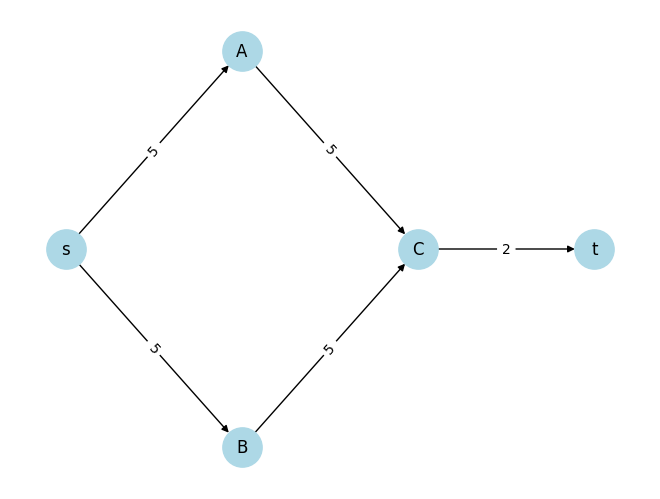

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes
G.add_node("s")
G.add_node("t")
G.add_node("A")
G.add_node("B")
G.add_node("C")

# Add edges with integer capacities
G.add_edge("s", "A", capacity=5)
G.add_edge("s", "B", capacity=5)
G.add_edge("B", "C", capacity=5)
G.add_edge("A", "C", capacity=5)
G.add_edge("C", "t", capacity=2)

# Define positions for the nodes to make a nice layout
pos = {
    "s": (0, 0),
    "A": (1, 2),
    "B": (1, -2),
    "C": (2, 0),
    "t": (3, 0),
}

# Draw the graph
nx.draw(G, pos, with_labels=True, node_size=800, node_color="lightblue")
labels = nx.get_edge_attributes(G, "capacity")
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.show()
